In [1]:
import pandas as pd
import numpy as np

# importing data

In [5]:
pca_data=pd.read_csv(r"C:\Users\cl501_26\Downloads\data for phishing clustering\pca_data.csv",index_col=[0])
pca_data.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42
0,-1.378662,0.324723,-0.678316,-1.096767,-0.104987,0.955367,0.477642,-0.286234,-0.230561,-0.056438,...,0.480399,-0.099283,0.549424,0.709826,0.426515,0.920022,0.220622,0.118701,-0.107135,-0.247513
1,-0.841598,-0.000786,-0.707815,2.219164,-0.580844,-0.425952,0.599699,0.023524,0.820418,0.110980,...,0.749960,0.341581,-0.253211,0.095166,0.000714,-0.647273,0.108049,-0.568100,0.250677,-0.784381
2,-1.122874,0.260022,-1.032923,1.366636,-1.704659,0.615378,0.361867,0.915835,0.222459,-0.293066,...,-0.306007,0.082364,-0.187737,0.599123,0.611107,1.313692,0.048619,0.126419,-0.265820,0.459786
3,-2.455080,0.753804,-1.074699,-0.878290,0.567482,0.582563,0.252952,-0.660451,-0.894300,-0.058994,...,0.755560,0.150444,0.294900,0.049874,0.055152,-0.508791,0.170911,0.065037,-0.037749,-0.291659
4,-3.800763,1.333693,-1.049554,-1.321663,2.852828,-0.921952,-2.401585,3.465858,0.842325,0.506730,...,-0.632440,0.113311,-1.231925,-0.875267,0.130761,0.246138,-0.093915,-0.362125,-0.128031,0.263069


In [6]:
tsne_data=pd.read_csv('tsne_data.csv',index_col=[0])
tsne_data.head()

FileNotFoundError: [Errno 2] No such file or directory: 'tsne_data.csv'

In [50]:
Y = pd.read_csv(r"C:\Users\cl501_26\Downloads\data for phishing clustering\output_label.csv",index_col=[0])
Y

,label
0,1
1,1
2,1
3,1
4,1
...,...
235790,1
235791,1
235792,1
235793,0


# 1. K-Means

In [51]:
from sklearn.cluster import KMeans

# create a k-means instance
kmeans=KMeans(n_clusters=2,init='k-means++',max_iter=194,random_state=42)
kmeans.fit(pca_data)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=194, n_clusters=2, random_state=42)

In [52]:
pca_predict=kmeans.predict(pca_data)
centers=kmeans.cluster_centers_
print("pca predict",pca_predict)
print("centers",centers)

pca predict [1 1 1 ... 1 0 1]
centers [[ 3.01343081e+00 -4.76042949e-01  7.76435770e-02 -1.64120071e-01
   2.87567904e-01 -2.36398042e-02 -3.85182343e-02 -7.15466573e-02
  -1.04998909e-02 -8.77674468e-04 -6.32420867e-02  5.99692611e-02
   7.05705591e-02  4.47151339e-03 -1.19022252e-02 -4.27155288e-02
   1.63298831e-02 -3.29889402e-02 -1.55627885e-02  8.50810377e-02
   1.81171098e-02  2.31973838e-02  1.80836895e-02  1.93934188e-02
  -3.09300041e-02  6.13705583e-03  3.01660120e-02  6.72833788e-02
   6.19242662e-02 -2.48740172e-02 -1.06007198e-02  3.09372912e-02
  -1.46927226e-02  3.28483542e-03 -1.65691803e-02  3.63450112e-02
   1.88856775e-02 -2.62652761e-02 -1.40392238e-02 -4.69450346e-04
   5.40003809e-03  1.08510212e-02 -4.55191440e-15]
 [-2.26861910e+00  3.58382254e-01 -5.84528774e-02  1.23555493e-01
  -2.16491461e-01  1.77968949e-02  2.89979122e-02  5.38628970e-02
   7.90469553e-03  6.60744908e-04  4.76109175e-02 -4.51470167e-02
  -5.31280552e-02 -3.36631611e-03  8.96042324e-03  3.

In [53]:
pca_data["clusters"] = pca_predict

In [54]:
pca_predict.shape

(235795,)

In [55]:
kmeans.inertia_

9708416.664487446

In [56]:
import matplotlib.pyplot as plt


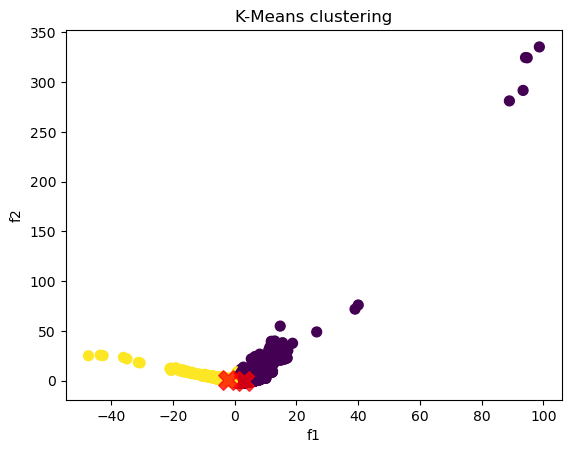

In [57]:
plt.scatter(pca_data.iloc[:,0],pca_data.iloc[:,1],c=pca_predict,s=50,cmap='viridis')
plt.scatter(centers[:,0],centers[:,1],c='red',s=200,alpha=0.75,marker='X')
plt.title('K-Means clustering')
plt.xlabel('f1')
plt.ylabel('f2')
plt.show()


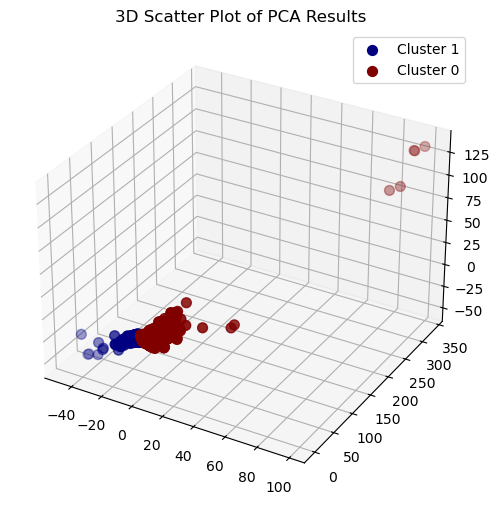

In [58]:
x = pca_data["PC1"]
y=pca_data["PC2"]
z=pca_data["PC3"]

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# unique clusters 
uniq_clusters = pca_data["clusters"].unique()
colors = plt.cm.jet(np.linspace(0, 1, len(uniq_clusters)))

# Plot each cluster
for cluster, color in zip(uniq_clusters, colors):
    ix = pca_data['clusters'] == cluster
    ax.scatter(x[ix], y[ix], z[ix], c=[color], label=f'Cluster {cluster}', s=50)

ax.set_title('3D Scatter Plot of PCA Results')
ax.legend()
plt.show()

In [59]:
from sklearn.metrics import *

In [60]:
print(type(Y))
print(type(pca_predict))

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


In [61]:
acc1=accuracy_score(Y,pca_predict)
acc1

0.9849191034585127

In [62]:
prec1=precision_score(Y,pca_predict,pos_label=1)
prec1

0.9880019625042744

In [63]:

pca_data["y_pred_kmeans"] =pca_predict
pca_data["y_pred_kmeans"] , Y

(0         1
 1         1
 2         1
 3         1
 4         1
          ..
 235790    1
 235791    1
 235792    1
 235793    0
 235794    1
 Name: y_pred_kmeans, Length: 235795, dtype: int32,
         label
 0           1
 1           1
 2           1
 3           1
 4           1
 ...       ...
 235790      1
 235791      1
 235792      1
 235793      0
 235794      1
 
 [235795 rows x 1 columns])

### Kmeans dosen't work well on this data as the datapoints are closely situated and much seperation cannot be found

### hyper parameter tuning for kmeans
1. Grid Search

In [64]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [65]:
param_grid={
    'n_clusters':[2],
    'init': ['k-means++','random'],
    'max_iter':[100,200,300]
}
kmeans1=KMeans()
gridsearch=GridSearchCV(kmeans1,param_grid,cv=5)
gridsearch.fit(pca_data)
best_params=gridsearch.best_params_
print(best_params)

{'init': 'k-means++', 'max_iter': 100, 'n_clusters': 2}


##### 2. Random Search

In [66]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [67]:
param_dist={
    'n_clusters':[2],
    'init': ['k-means++','random'],
    'max_iter': randint(100,500)
}
kmeans1=KMeans()
randomsearch=RandomizedSearchCV(kmeans1,param_dist,cv=5)
randomsearch.fit(pca_data)
best_params=randomsearch.best_params_
print(best_params)

{'init': 'k-means++', 'max_iter': 473, 'n_clusters': 2}


# 2. Hierarchichal Clustering

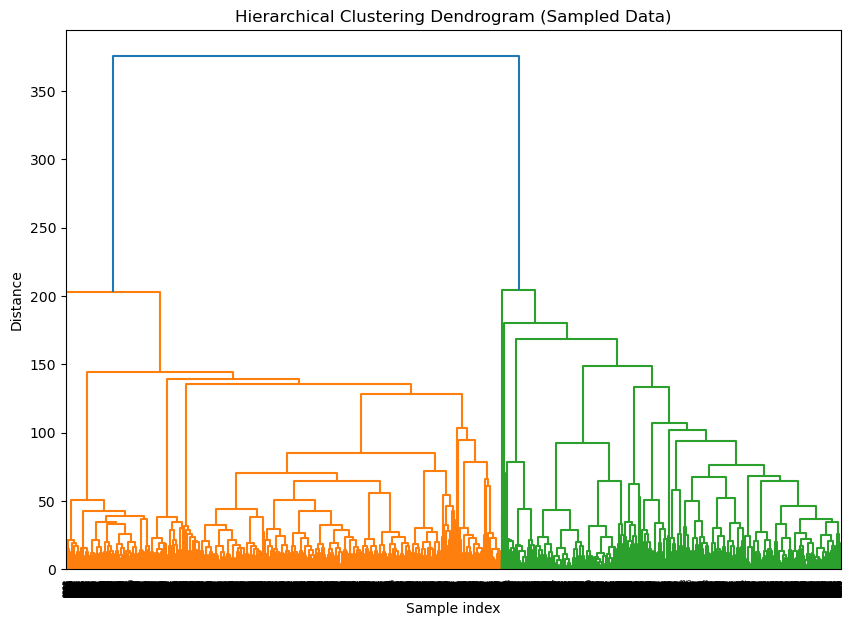

In [68]:
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
from scipy.cluster.hierarchy import dendrogram, linkage

# Downsample your dataset (e.g., use 10,000 samples)
sample_size = 10000
pca_data_sampled = shuffle(pca_data, random_state=42)[:sample_size]

# Perform hierarchical clustering on the downsampled data
Z = linkage(pca_data_sampled, 'ward')

# Plot dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram (Sampled Data)')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()


# 4. Isolation forest

        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -1.378662  0.324723 -0.678316 -1.096767 -0.104987  0.955367  0.477642   
1 -0.841598 -0.000786 -0.707815  2.219164 -0.580844 -0.425952  0.599699   
2 -1.122874  0.260022 -1.032923  1.366636 -1.704659  0.615378  0.361867   
3 -2.455080  0.753804 -1.074699 -0.878290  0.567482  0.582563  0.252952   
4 -3.800763  1.333693 -1.049554 -1.321663  2.852828 -0.921952 -2.401585   

        PC8       PC9      PC10  ...      PC37      PC38      PC39      PC40  \
0 -0.286234 -0.230561 -0.056438  ...  0.426515  0.920022  0.220622  0.118701   
1  0.023524  0.820418  0.110980  ...  0.000714 -0.647273  0.108049 -0.568100   
2  0.915835  0.222459 -0.293066  ...  0.611107  1.313692  0.048619  0.126419   
3 -0.660451 -0.894300 -0.058994  ...  0.055152 -0.508791  0.170911  0.065037   
4  3.465858  0.842325  0.506730  ...  0.130761  0.246138 -0.093915 -0.362125   

       PC41      PC42  clusters  y_pred_kmeans  anomaly  anomaly_lab

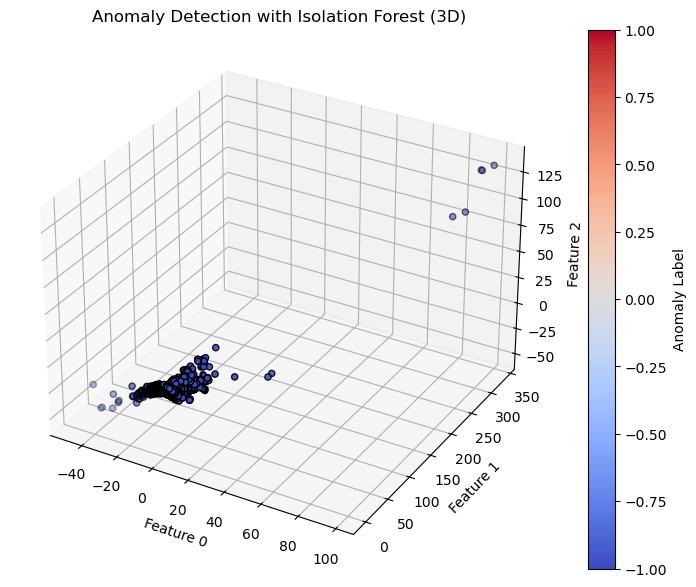

In [69]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler


from mpl_toolkits.mplot3d import Axes3D





# Train Isolation Forest
iso_forest = IsolationForest(n_estimators=100,max_samples='auto',contamination=0.1, random_state=42)  # Adjust contamination based on expected outliers
iso_forest.fit(pca_data)

# Predict anomalies
predictions = iso_forest.predict(pca_data)
# -1 indicates an anomaly (e.g., phishing URL), 1 indicates normal

# Add predictions to the DataFrame
pca_data['anomaly'] = predictions
pca_data['anomaly_label'] = pca_data['anomaly'].map({1: 'Normal', -1: 'Phishing'})

# Display results
print(pca_data.head())

# Plot results (optional)
import matplotlib.pyplot as plt
# Plot results in 3D using three specific features
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
sc = ax.scatter(pca_data['PC1'], pca_data['PC2'], pca_data['PC3'], c=pca_data['anomaly'], cmap='coolwarm', edgecolor='k')

# Labels and title
ax.set_xlabel('Feature 0')
ax.set_ylabel('Feature 1')
ax.set_zlabel('Feature 2')
ax.set_title('Anomaly Detection with Isolation Forest (3D)')

# Color bar
plt.colorbar(sc, label='Anomaly Label')

plt.show()


In [70]:
from sklearn.metrics import *

##### converting presdictions from -1 to 1 and 1 to 0

In [71]:
y_pred=[1 if x==-1 else 0 for x in predictions]
pca_data["y_pred"] = [1 if x==-1 else 0 for x in predictions]
pca_data[["y_pred","anomaly_label"]]

,y_pred,anomaly_label
0,0,Normal
1,0,Normal
2,0,Normal
3,1,Phishing
4,0,Normal
...,...,...
235790,0,Normal
235791,0,Normal
235792,0,Normal
235793,0,Normal


In [74]:
prec=precision_score(Y,y_pred,pos_label=1)
prec

0.4618320610687023

In [75]:
acc=accuracy_score(Y,y_pred)
acc

0.4204711719926207

In [ ]:
pca_data

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC37,PC38,PC39,PC40,PC41,PC42,anomaly,anomaly_label,y_pred,y_pred_kmeans
0,-1.378662,0.324723,-0.678316,-1.096767,-0.104987,0.955367,0.477642,-0.286234,-0.230561,-0.056438,...,0.426515,0.920022,0.220622,0.118701,-0.107135,-0.247513,1,Normal,0,1
1,-0.841598,-0.000786,-0.707815,2.219164,-0.580844,-0.425952,0.599699,0.023524,0.820418,0.110980,...,0.000714,-0.647273,0.108049,-0.568100,0.250677,-0.784381,1,Normal,0,1
2,-1.122874,0.260022,-1.032923,1.366636,-1.704659,0.615378,0.361867,0.915835,0.222459,-0.293066,...,0.611107,1.313692,0.048619,0.126419,-0.265820,0.459786,1,Normal,0,1
3,-2.455080,0.753804,-1.074699,-0.878290,0.567482,0.582563,0.252952,-0.660451,-0.894300,-0.058994,...,0.055152,-0.508791,0.170911,0.065037,-0.037749,-0.291659,-1,Phishing,1,1
4,-3.800763,1.333693,-1.049554,-1.321663,2.852828,-0.921952,-2.401585,3.465858,0.842325,0.506730,...,0.130761,0.246138,-0.093915,-0.362125,-0.128031,0.263069,-1,Phishing,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235790,-3.782410,1.020506,-0.077056,-0.782099,-0.727545,0.361507,0.455551,-0.309839,0.886216,0.510433,...,0.359416,-0.295259,0.222165,-0.086017,-0.131831,0.029187,1,Normal,0,1
235791,-0.964874,0.516785,-2.221999,1.675765,-1.011234,0.448770,0.078040,0.551362,-0.935288,-0.433384,...,-1.261044,-0.241099,0.491604,-0.053508,-0.094520,-0.047255,1,Normal,0,1
235792,-2.758728,0.386707,0.193512,0.892685,-1.666808,0.173100,0.432919,0.618102,0.911869,-0.183599,...,-0.021629,-0.009247,-0.446815,-0.103278,-0.020310,0.271679,1,Normal,0,1
235793,2.884210,0.812572,-3.238192,-1.734662,-0.875155,1.559405,-0.876397,0.387576,-0.476262,0.619637,...,-0.418853,0.484254,0.144505,-0.100548,-0.107840,0.180638,1,Normal,0,0


3. Agglomerative Clustering

In [100]:
from sklearn.cluster import AgglomerativeClustering

agg_data =  pca_data.drop(["anomaly","anomaly_label"	,"y_pred"	,"y_pred_kmeans"],axis=1)
agg_sample = agg_data.sample(n=10000)
Y_sample= Y.iloc[agg_sample.index]
agglomerative = AgglomerativeClustering(n_clusters=2)
labels = agglomerative.fit_predict(agg_sample)
labels

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [96]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, silhouette_score

# Define the model
model = AgglomerativeClustering()

# Define the parameters grid
param_grid = {
    'affinity': ['euclidean', 'l1', 'l2', 'manhattan', 'cosine'],
    'linkage': ['ward', 'complete', 'average', 'single'],
    'compute_full_tree': [True, False, 'auto']
}

# Define a custom scorer
def silhouette_scorer(estimator, X):
    labels = estimator.fit_predict(X)
    return silhouette_score(X, labels)

scorer = make_scorer(silhouette_scorer)

# Perform Grid Search
grid_search = GridSearchCV(model, param_grid, scoring=scorer, cv=5)
grid_search.fit(agg_sample)

# Best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Silhouette Score:", best_score)


Best Parameters: {'affinity': 'euclidean', 'compute_full_tree': True, 'linkage': 'ward'}
Best Silhouette Score: nan


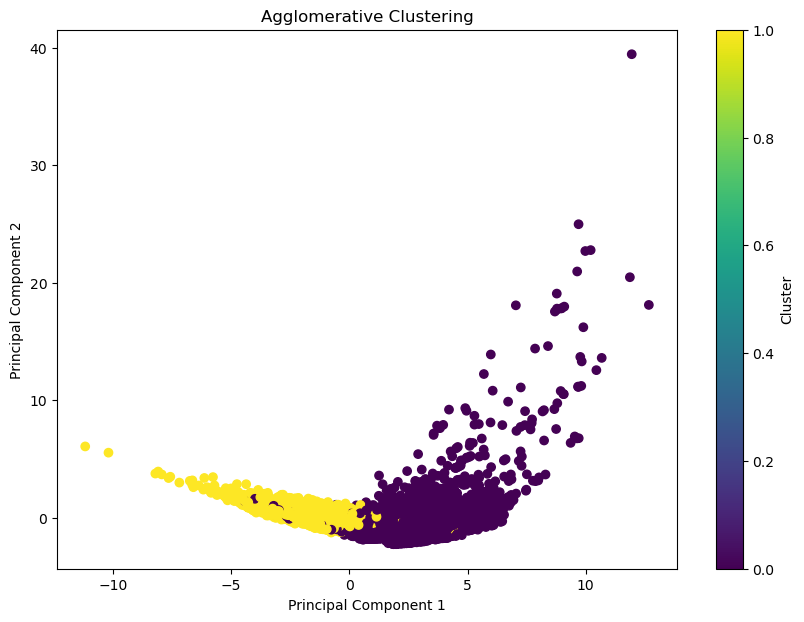

In [98]:
# Plot the clusters
labels = agglomerative.fit_predict(agg_sample)
plt.figure(figsize=(10, 7))
plt.scatter(agg_sample.iloc[:, 0], agg_sample.iloc[:, 1], c=labels, cmap='viridis', marker='o')
plt.title('Agglomerative Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()


In [103]:
db_score = davies_bouldin_score(agg_sample, labels)
ch_score = calinski_harabasz_score(agg_sample, labels)

print("Davies-Bouldin Score:", db_score)
print("Calinski-Harabasz Score:", ch_score)

Davies-Bouldin Score: 0.014151720203929758
Calinski-Harabasz Score: 3922.486223566859


**Insights**

1. Davies-Bouldin Score: A lower score indicates better clustering. Your score of 0.014 is quite low, suggesting that the clusters are well-separated and compact.

2. Calinski-Harabasz Score: A higher score indicates better-defined clusters. Your score of 3922.49 is quite high, which also suggests good clustering performance.

4. Spectral Clustering

In [105]:
from sklearn.cluster import SpectralClustering

spec_data =  pca_data.drop(["anomaly","anomaly_label"	,"y_pred"	,"y_pred_kmeans"],axis=1)


spectral = SpectralClustering(n_clusters=2, affinity='nearest_neighbors')
labels = spectral.fit_predict(spec_data)

In [ ]:
# Plot the clusters

plt.figure(figsize=(10, 7))
plt.scatter(spec_data.iloc[:, 0], spec_data.iloc[:, 1], c=labels, cmap='viridis', marker='o')
plt.title('Spectral Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()


In [ ]:
db_score = davies_bouldin_score(spec_data, labels)
ch_score = calinski_harabasz_score(spec_data, labels)

print("Davies-Bouldin Score:", db_score)
print("Calinski-Harabasz Score:", ch_score)